In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from knnClassifier import knnClassifier
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from collections import defaultdict

/Users/RyanSampana/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
#x = [100,1000,10000,20000,30000,40000]
#y = [0.58,0.705,0.812,0.824,0.824,0.824]
#err = [0.05,0.03,0.02,0.02,0.02,0.02]

In [3]:
df_in = pd.read_csv(r'datasets/train_in.csv',header=None, skiprows=1, usecols=[1])
X = [val for sublist in df_in.values.tolist() for val in sublist]

df_out = pd.read_csv(r'datasets/train_out.csv',header=None, skiprows=1, usecols=[1])
y = [val for sublist in df_out.values.tolist() for val in sublist]
# due to the large size of the dataset we simply use 20,000 examples to test features. 
# We don't have the resources to test on all 85K
X = X[0:1000]         
y = y[0:1000]

le = preprocessing.LabelEncoder()
y = le.fit_transform(y)
feature_stats = defaultdict()
for feature_size in [100,1000,2000,3000,5000,10000,20000,30000,40000]:
    tfidf_vectorizer = TfidfVectorizer(max_features=feature_size, stop_words='english', ngram_range=(1,2), sublinear_tf=True) 
    tfidf = tfidf_vectorizer.fit_transform(X)
    tfidf = tfidf.toarray()

    # 1000 chunks
    kf = KFold(n_splits=5)
    scores = []
    print "start split featuresize",feature_size
    for train_index, test_index in kf.split(tfidf):

        my_classifier = knnClassifier()
        # fit
        my_classifier.fit(tfidf[train_index], y[train_index])
        # predict
        predictions = my_classifier.predict(tfidf[test_index],k = 3)
        scores.append(accuracy_score(y[test_index],predictions))
        print "split"
    feature_stats[feature_size] = scores
    print "done featuresize",feature_size
print "done"

start split featuresize 100
split
split
split
split
split
done featuresize 100
start split featuresize 1000
split
split
split
split
split
done featuresize 1000
start split featuresize 2000
split
split
split
split
split
done featuresize 2000
start split featuresize 3000
split
split
split
split
split
done featuresize 3000
start split featuresize 5000
split
split
split
split
split
done featuresize 5000
start split featuresize 10000
split
split
split
split
split
done featuresize 10000
start split featuresize 20000
split
split
split
split
split
done featuresize 20000
start split featuresize 30000
split
split
split
split
split
done featuresize 30000
start split featuresize 40000
split
split
split
split
split
done featuresize 40000
done


In [14]:
x = []
y = []
err = []
for k in feature_stats.iterkeys():
    x.append(k)
    y.append(np.mean(feature_stats[k])*100)
    err.append(np.std(feature_stats[k])*100)
print x,y,err

[20000, 10000, 100, 1000, 30000, 2000, 5000, 40000, 3000] [82.400000000000006, 81.199999999999989, 48.5, 70.399999999999991, 82.400000000000006, 79.900000000000006, 81.699999999999989, 82.599999999999994, 80.800000000000011] [2.8879058156387285, 2.6191601707417562, 5.8566201857385281, 3.4263683398023619, 2.267156809750924, 0.91651513899116477, 2.6570660511172828, 2.2226110770892857, 2.0396078054371118]


<function matplotlib.pyplot.close>

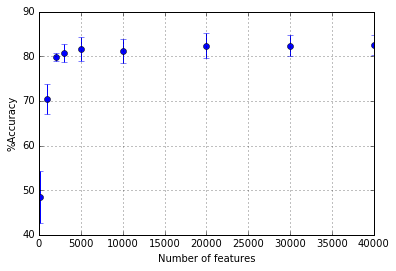

In [16]:
plt.figure(1)
plt.errorbar(x,y,yerr=err,fmt='o')
plt.grid()
plt.xlabel('Number of features')
plt.ylabel('%Accuracy')
plt.savefig('./featuresknn.pdf')
plt.close